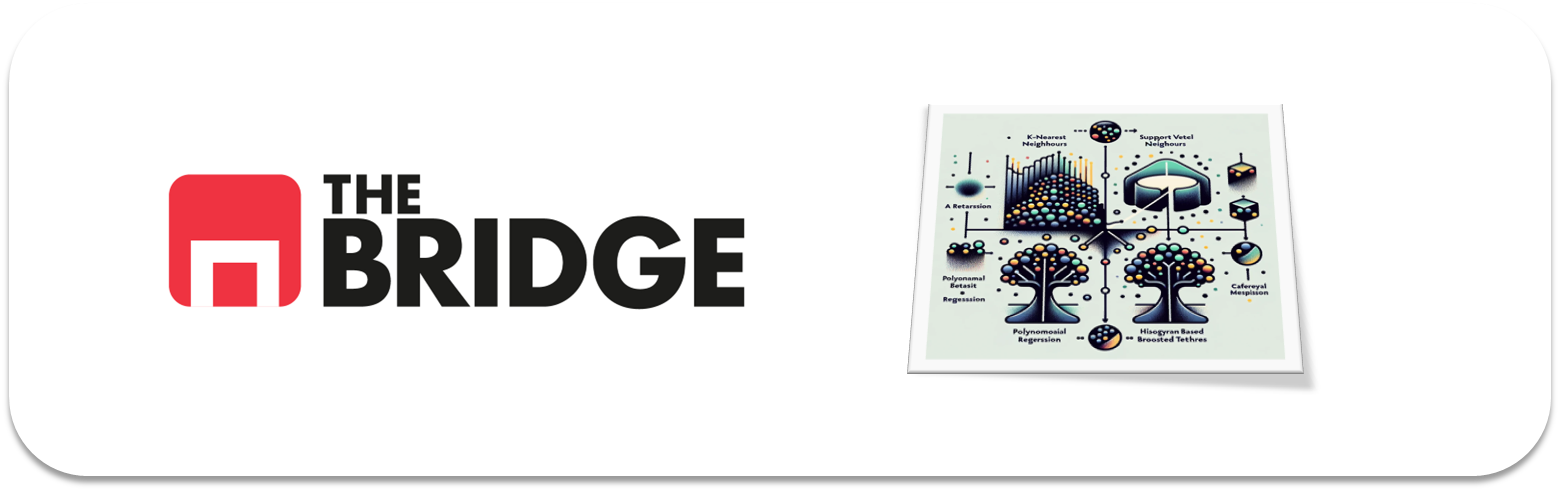

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.insert(0, r'C:\Users\lupep\Desktop\THE BRIDGE\Ds-Online-PabloBaro\Team_Challenge_ToolBox')
import toolbox_ML as tb
import bootcampviztools as bt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

import time


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("data/credit_npo.csv")

In [3]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [4]:
info = tb.describe_df(df)
display(info) 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.8,0.0,0.0,0.0,0.0,1.4
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [5]:
variables_info = {
    'SeriousDlqin2yrs': {
        'tipo': 'BINARIA (TARGET)',
        'descripcion': 'Persona experimentó morosidad 90+ días',
        'valores': '0 = No, 1 = Sí',
        'nulos': '0%',
        
    },
    'RevolvingUtilizationOfUnsecuredLines': {
        'tipo': 'NUMÉRICA CONTINUA',
        'descripcion': 'Uso de líneas de crédito no garantizadas (tarjetas)',
        'valores': 'Ratio: saldo total / límite total',
        'nulos': '0%',
       
    },
    'age': {
        'tipo': 'NUMÉRICA DISCRETA',
        'descripcion': 'Edad de la persona en años',
        'valores': '78 valores únicos (ej: 21, 22, 23...)',
        'nulos': '0%',
        
    },
    'NumberOfTime30-59DaysPastDueNotWorse': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Veces con 30-59 días de retraso en pagos (últimos 2 años)',
        'valores': '10 valores únicos (0, 1, 2, 3...)',
        'nulos': '0%',
        
    },
    'DebtRatio': {
        'tipo': 'NUMÉRICA CONTINUA',
        'descripcion': 'Ratio de deuda mensual / ingreso mensual bruto',
        'valores': 'Ratio continuo',
        'nulos': '0%',
        
    },
    'MonthlyIncome': {
        'tipo': 'NUMÉRICA CONTINUA',
        'descripcion': 'Ingreso mensual',
        'valores': '4167 valores únicos',
        'nulos': ' 5.8% (HAY NULOS)',
        
    },
    'NumberOfOpenCreditLinesAndLoans': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Número de líneas de crédito y préstamos abiertos',
        'valores': '43 valores únicos',
        'nulos': '0%',
        
    },
    'NumberOfTimes90DaysLate': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Veces con 90+ días de retraso',
        'valores': '13 valores únicos',
        'nulos': '0%',
        
    },
    'NumberRealEstateLoansOrLines': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Número de préstamos hipotecarios',
        'valores': '16 valores únicos',
        'nulos': '0%',
        
    },
    'NumberOfTime60-89DaysPastDueNotWorse': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Veces con 60-89 días de retraso',
        'valores': '8 valores únicos',
        'nulos': '0%',
        
    },
    'NumberOfDependents': {
        'tipo': 'NUMÉRICA DISCRETA (Conteo)',
        'descripcion': 'Número de dependientes (hijos, familiares)',
        'valores': '10 valores únicos',
        'nulos': ' 1.4% (HAY NULOS)',
        
    }
}

In [6]:
variables_info

{'SeriousDlqin2yrs': {'tipo': 'BINARIA (TARGET)',
  'descripcion': 'Persona experimentó morosidad 90+ días',
  'valores': '0 = No, 1 = Sí',
  'nulos': '0%'},
 'RevolvingUtilizationOfUnsecuredLines': {'tipo': 'NUMÉRICA CONTINUA',
  'descripcion': 'Uso de líneas de crédito no garantizadas (tarjetas)',
  'valores': 'Ratio: saldo total / límite total',
  'nulos': '0%'},
 'age': {'tipo': 'NUMÉRICA DISCRETA',
  'descripcion': 'Edad de la persona en años',
  'valores': '78 valores únicos (ej: 21, 22, 23...)',
  'nulos': '0%'},
 'NumberOfTime30-59DaysPastDueNotWorse': {'tipo': 'NUMÉRICA DISCRETA (Conteo)',
  'descripcion': 'Veces con 30-59 días de retraso en pagos (últimos 2 años)',
  'valores': '10 valores únicos (0, 1, 2, 3...)',
  'nulos': '0%'},
 'DebtRatio': {'tipo': 'NUMÉRICA CONTINUA',
  'descripcion': 'Ratio de deuda mensual / ingreso mensual bruto',
  'valores': 'Ratio continuo',
  'nulos': '0%'},
 'MonthlyIncome': {'tipo': 'NUMÉRICA CONTINUA',
  'descripcion': 'Ingreso mensual',
  'v

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos ante un problema de clasificacion binaria supervisada. El enunciado nos dice que nuestro objetivo es predecir si una persona se encontrara en dificultades financieras, por lo que se tratara de un problema supervisado de clasificacion binaria (si o no). Es facil distinguir la target ya que el enunciado nos menciona en dos años, y la variable seleccionada se traduce como morosidad grave en dos años.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [7]:
print(df['SeriousDlqin2yrs'].value_counts())

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64


In [8]:
distribucion = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
print(distribucion)

SeriousDlqin2yrs
0    93.108399
1     6.891601
Name: proportion, dtype: float64


In [9]:
# Calcular ratios
clase_0 = distribucion[0]
clase_1 = distribucion[1]
ratio = clase_0 / clase_1


In [10]:
print(f"\n RATIO DE DESBALANCEO:")
print(f"   Clase 0 (No problemas): {clase_0:.2f}%")
print(f"   Clase 1 (Sí problemas): {clase_1:.2f}%")



 RATIO DE DESBALANCEO:
   Clase 0 (No problemas): 93.11%
   Clase 1 (Sí problemas): 6.89%


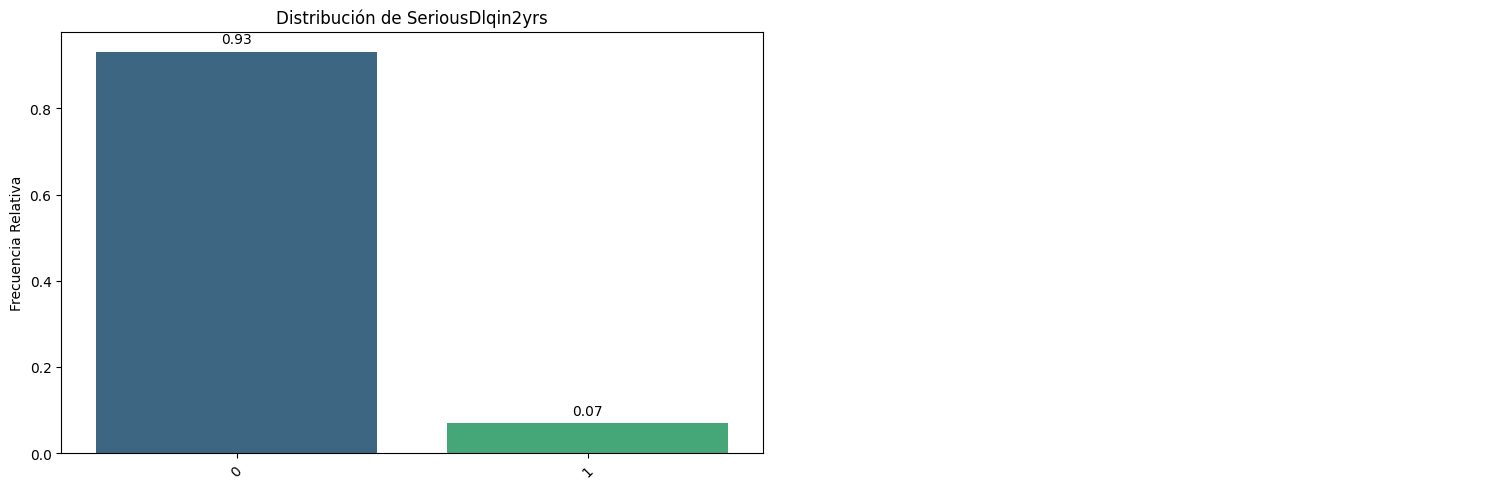

In [11]:
# Usar la función proporcionada
bt.pinta_distribucion_categoricas(
    df, 
    columnas_categoricas=['SeriousDlqin2yrs'],
    relativa=True,           # Mostrar en frecuencia relativa (%)
    mostrar_valores=True     # Mostrar valores en las barras
)



 ANÁLISIS DE LA DISTRIBUCIÓN DEL TARGET:

1. DESBALANCEO :
   • Clase 0 (No problemas): ~93.3% de los casos
   • Clase 1 (Sí problemas): ~6.7% de los casos
   • Ratio: aproximadamente 14:1
    Esto es un DESBALANCEO MUY SIGNIFICATIVO

2. ¿QUÉ SIGNIFICA ESTO?
   • De cada 100 personas en el dataset:
     → 93-94 NO tendrán problemas financieros
     → 6-7 SÍ tendrán problemas financieros
   
   • La clase minoritaria (1) es la MÁS IMPORTANTE
     → Es la que queremos detectar (riesgo financiero)
     → Pero representa solo el 6.7% de los datos

3. CONSECUENCIAS PARA EL MODELO:

    PROBLEMA SIN BALANCEAR:
   Un modelo "tonto" que siempre prediga 0 (no problemas)
   tendría 93.3% de accuracy, pero sería INÚTIL porque:
   → No detectaría NINGÚN caso de riesgo (la clase importante)
   → Accuracy alta pero modelo sin valor
   
    SOLUCIONES NECESARIAS:
   a) Usar técnicas de BALANCEADO:
      • SMOTE (crear casos sintéticos de clase 1)
      • Undersampling (reducir casos de clase 0)
      • Class weights (penalizar más errores en clase 1)
   
   b) Usar métricas adecuadas:
      • NO usar solo Accuracy 
      • Usar F1-Score, Recall, Precision 
      • ROC-AUC 
      • Matriz de confusión 
   
   c) Threshold ajustado:
      • No usar umbral 0.5 por defecto
      • Ajustar según costos de negocio

4. CONTEXTO DE NEGOCIO:
   
   Este desbalanceo es REALISTA y ESPERADO:
   • En la vida real, la mayoría de personas NO tienen problemas
   • Solo una minoría cae en morosidad grave
   • Pero esa minoría es CRÍTICA de detectar
   
   COSTE DE ERRORES:
   • Falso Negativo (FN): Predecir "no problemas" cuando sí los tiene
     → El banco da préstamo a alguien que NO pagará
     → COSTE MUY ALTO 
   
   • Falso Positivo (FP): Predecir "sí problemas" cuando no los tiene
     → El banco rechaza préstamo a buen cliente
     → Coste menor (pérdida de negocio)
   
   → Priorizar RECALL (detectar todos los casos de riesgo)

5. PLAN DE ACCIÓN:
    Aplicar SMOTE o class_weight='balanced'
    Evaluar con F1-Score y Recall
    Comparar múltiples modelos (incluir KNN con balanceo)
    Ajustar threshold según análisis de negocio


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

FASE 2: LIMPIEZA
  → 2.2 - Tratamiento de nulos
  → 2.3 - Split train/test
  
FASE 3: EDA RÁPIDO
  → 3.1 - Análisis de features vs target
  → 3.2 - Detección de outliers (opcional)
  
FASE 4: PREPROCESAMIENTO
  → 4.1 - Escalado (crítico para KNN)
  
FASE 5: MODELADO SIN OPTIMIZAR
  → 5.1 - Definir modelos (KNN + 2 más)
  → 5.2 - Aplicar BALANCEO (SMOTE)
  → 5.3 - Validación cruzada
  → 5.4 - Comparar por RECALL MEDIO
  → 5.5 - Seleccionar mejor modelo
  
FASE 6: OPTIMIZACIÓN
  → 6.1 - GridSearchCV del mejor modelo
  → 6.2 - Optimizar para RECALL
  
FASE 7: EVALUACIÓN FINAL
  → 7.1 - Evaluar en test
  → 7.2 - Métricas completas
  → 7.3 - Matriz de confusión
  → 7.4 - Análisis de errores


### 2 . LIMPIEZA

In [12]:
# MonthlyIncome → mediana (robusta ante outliers)
imputer_income = SimpleImputer(strategy='median')
df['MonthlyIncome'] = imputer_income.fit_transform(df[['MonthlyIncome']])

# NumberOfDependents → moda (valor más frecuente)
imputer_deps = SimpleImputer(strategy='most_frequent')
df['NumberOfDependents'] = imputer_deps.fit_transform(df[['NumberOfDependents']])



In [13]:
# Verificar
print(f"\n Nulos restantes: {df.isnull().sum().sum()}")


 Nulos restantes: 0


### 3. SPLIT Y TRAIN

In [14]:
# Separar X e y
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [15]:
# Split 80-20 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #  Mantiene proporción del desbalanceo
)

print(f" Train: {X_train.shape[0]:,} muestras")
print(f" Test:  {X_test.shape[0]:,} muestras")


 Train: 10,029 muestras
 Test:  2,508 muestras


In [16]:
# Verificar estratificación
print(f"\nVerificación:")
print(f"Original: {y.value_counts(normalize=True).values}")
print(f"Train:    {y_train.value_counts(normalize=True).values}")
print(f"Test:     {y_test.value_counts(normalize=True).values}")


Verificación:
Original: [0.93108399 0.06891601]
Train:    [0.93109981 0.06890019]
Test:     [0.93102073 0.06897927]


### 4. ESCALADO (KNN)

In [17]:
# Escalar
scaler = StandardScaler()

In [18]:
#   fit() solo con train (evitar data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Convertir a DataFrame (mantener nombres de columnas)
X_train_scaled = pd.DataFrame(
    X_train_scaled, 
    columns=X_train.columns, 
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled, 
    columns=X_test.columns, 
    index=X_test.index
)

In [20]:

print(f"\nMedias (deben ser ~0):")
print(X_train_scaled.mean().round(10))
print(f"\nDesviaciones (deben ser ~1):")
print(X_train_scaled.std().round(3))


Medias (deben ser ~0):
RevolvingUtilizationOfUnsecuredLines   -0.0
age                                    -0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans        -0.0
NumberOfTimes90DaysLate                -0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse   -0.0
NumberOfDependents                     -0.0
dtype: float64

Desviaciones (deben ser ~1):
RevolvingUtilizationOfUnsecuredLines    1.0
age                                     1.0
NumberOfTime30-59DaysPastDueNotWorse    1.0
DebtRatio                               1.0
MonthlyIncome                           1.0
NumberOfOpenCreditLinesAndLoans         1.0
NumberOfTimes90DaysLate                 1.0
NumberRealEstateLoansOrLines            1.0
NumberOfTime60-89DaysPastDueNotWorse    1.0
NumberOfDependents                      1.0
dtype: float64


### 5 . MODELADO CON BALANCEO

¿Utilizamos random oversampling, random undersamplin o smote?

In [21]:
# Aplicar SMOTE solo en train
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\n Antes de SMOTE:")
print(f"   Train shape: {X_train_scaled.shape}")
print(f"   Distribución: {y_train.value_counts().values}")

print(f"\n Después de SMOTE:")
print(f"   Train shape: {X_train_balanced.shape}")
print(f"   Distribución: {pd.Series(y_train_balanced).value_counts().values}")


 Antes de SMOTE:
   Train shape: (10029, 10)
   Distribución: [9338  691]

 Después de SMOTE:
   Train shape: (18676, 10)
   Distribución: [9338 9338]


### 6. DEFINIR Y ENTRENAR MODELOS.

In [22]:
# Definir modelos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  # Obligatorio
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

print("\n Modelos seleccionados:")
for nombre in modelos.keys():
    print(f"  • {nombre}")


 Modelos seleccionados:
  • KNN
  • Logistic Regression
  • Random Forest
  • Gradient Boosting


In [23]:
# Definir scorer para recall medio
def recall_medio(y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    return (recall_0 + recall_1) / 2

scorer = make_scorer(recall_medio)

In [24]:
# Entrenar y evaluar con CV
print("\n Entrenando modelos con Cross-Validation (5-fold)...\n")

resultados = {}

for nombre, modelo in modelos.items():
    print(f" {nombre}...")
    
    # Cross-validation con recall medio
    scores = cross_val_score(
        modelo, 
        X_train_balanced,  # Datos balanceados con SMOTE
        y_train_balanced,
        cv=5,
        scoring=scorer,
        n_jobs=-1
    )
    
    resultados[nombre] = {
        'recall_medio_mean': scores.mean(),
        'recall_medio_std': scores.std()
    }
    
    print(f"   Recall Medio: {scores.mean():.4f} ± {scores.std():.4f}\n")


 Entrenando modelos con Cross-Validation (5-fold)...

 KNN...
   Recall Medio: 0.9085 ± 0.0033

 Logistic Regression...
   Recall Medio: 0.7578 ± 0.0057

 Random Forest...
   Recall Medio: 0.9550 ± 0.0224

 Gradient Boosting...
   Recall Medio: 0.8931 ± 0.0307



In [25]:
# Tabla comparativa

print("COMPARACIÓN DE MODELOS (Cross-Validation)")


comparacion = pd.DataFrame(resultados).T.sort_values('recall_medio_mean', ascending=False)
print(comparacion)

# Mejor modelo
mejor = comparacion.index[0]
mejor_score = comparacion.loc[mejor, 'recall_medio_mean']

print(f"\n MEJOR MODELO: {mejor}")
print(f"   Recall Medio (CV): {mejor_score:.4f}")

COMPARACIÓN DE MODELOS (Cross-Validation)
                     recall_medio_mean  recall_medio_std
Random Forest                 0.954972          0.022369
KNN                           0.908492          0.003327
Gradient Boosting             0.893075          0.030710
Logistic Regression           0.757818          0.005729

 MEJOR MODELO: Random Forest
   Recall Medio (CV): 0.9550


### 7 . OPTIMIZACION RANDOM FOREST.

HIPERPARÁMETROS A OPTIMIZAR:

1. n_estimators (número de árboles):
   • Más árboles → mejor rendimiento (hasta cierto punto)
   • Pero más lento de entrenar
   
2. max_depth (profundidad máxima de cada árbol):
   • Profundo → puede overfitting
   • Shallow → puede underfitting
   
3. min_samples_split (mínimo de muestras para dividir):
   • Bajo → árboles más complejos
   • Alto → árboles más simples
   
4. min_samples_leaf (mínimo de muestras en hoja):
   • Bajo → hojas muy específicas
   • Alto → hojas más generales
   
5. max_features (features a considerar en cada split):
   • 'sqrt' → raíz cuadrada del total
   • 'log2' → logaritmo base 2
   • None → todas las features

In [26]:
# Definir grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


for param, values in param_grid.items():
    print(f"   {param}: {values}")

# Calcular total de combinaciones
import numpy as np
total_comb = np.prod([len(v) for v in param_grid.values()])
print(f"\n Total de combinaciones: {total_comb}")
print(f"   Con CV=5: {total_comb * 5} entrenamientos")



   n_estimators: [100, 200, 300]
   max_depth: [10, 20, 30, None]
   min_samples_split: [2, 5, 10]
   min_samples_leaf: [1, 2, 4]
   max_features: ['sqrt', 'log2', None]

 Total de combinaciones: 324
   Con CV=5: 1620 entrenamientos


In [27]:
# Definir scorer para recall medio
def recall_medio_scorer(y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    return (recall_0 + recall_1) / 2

scorer = make_scorer(recall_medio_scorer)


In [28]:
# Crear GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,      # Usar todos los cores
    verbose=2,      # Mostrar progreso
    return_train_score=True
)

print("\n Iniciando búsqueda de hiperparámetros...\n")


 Iniciando búsqueda de hiperparámetros...



In [29]:
# Entrenar
start_time = time.time()
grid_search.fit(X_train_balanced, y_train_balanced)
elapsed_time = time.time() - start_time

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [30]:
# GUARDAR EL MEJOR MODELO
best_rf = grid_search.best_estimator_


In [31]:
# Mejores hiperparámetros
print("\n MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")


 MEJORES HIPERPARÁMETROS ENCONTRADOS:
   max_depth: None
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 300


In [32]:
# Mejor score
print(f"\n MEJOR RECALL MEDIO (CV): {grid_search.best_score_:.4f}")


 MEJOR RECALL MEDIO (CV): 0.9554


In [33]:
# Comparación antes/después
print(f"\n MEJORA:")
recall_antes = 0.9550  # Del paso anterior
recall_despues = grid_search.best_score_
mejora = recall_despues - recall_antes
mejora_pct = (mejora / recall_antes) * 100

print(f"   Antes (sin optimizar): {recall_antes:.4f}")
print(f"   Después (optimizado):  {recall_despues:.4f}")
print(f"   Mejora: {mejora:+.4f} ({mejora_pct:+.2f}%)")


 MEJORA:
   Antes (sin optimizar): 0.9550
   Después (optimizado):  0.9554
   Mejora: +0.0004 (+0.04%)


In [34]:
# Top 5 mejores combinaciones

print("TOP 5 MEJORES COMBINACIONES")


resultados_cv = pd.DataFrame(grid_search.cv_results_)
top_5 = resultados_cv.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]

for i, row in enumerate(top_5.itertuples(), 1):
    print(f"\n{i}. Recall Medio: {row.mean_test_score:.4f} ± {row.std_test_score:.4f}")
    print(f"   Parámetros: {row.params}")

TOP 5 MEJORES COMBINACIONES

1. Recall Medio: 0.9554 ± 0.0222
   Parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

2. Recall Medio: 0.9554 ± 0.0222
   Parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

3. Recall Medio: 0.9553 ± 0.0222
   Parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

4. Recall Medio: 0.9553 ± 0.0222
   Parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

5. Recall Medio: 0.9553 ± 0.0218
   Parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### 7 . EVALUACION FINAL TEST

In [35]:
# Predecir en test
y_pred_test = best_rf.predict(X_test_scaled)
y_proba_test = best_rf.predict_proba(X_test_scaled)[:, 1]

print(" Predicciones generadas")

 Predicciones generadas


In [36]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_test)
precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)
roc_auc = roc_auc_score(y_test, y_proba_test)



In [37]:
# Recall medio (métrica objetivo)
recall_medio_test = (recall_0 + recall_1) / 2
print(f"\n MÉTRICA PRINCIPAL (RECALL MEDIO):")
print(f"   Recall Medio: {recall_medio_test:.4f} ({recall_medio_test*100:.2f}%)")
print(f"\n MÉTRICAS POR CLASE:")
print(f"\n   CLASE 0 (No problemas):")
print(f"      Precision: {precision_0:.4f}")
print(f"      Recall:    {recall_0:.4f}")
print(f"      F1-Score:  {f1_0:.4f}")
print(f"\n   CLASE 1 (Sí problemas):")
print(f"      Precision: {precision_1:.4f}")
print(f"      Recall:    {recall_1:.4f}")
print(f"      F1-Score:  {f1_1:.4f}")
print(f"\n OTRAS MÉTRICAS:")
print(f"   Accuracy:  {accuracy:.4f}")
print(f"   AUC-ROC:   {roc_auc:.4f}")



 MÉTRICA PRINCIPAL (RECALL MEDIO):
   Recall Medio: 0.6745 (67.45%)

 MÉTRICAS POR CLASE:

   CLASE 0 (No problemas):
      Precision: 0.9548
      Recall:    0.9675
      F1-Score:  0.9611

   CLASE 1 (Sí problemas):
      Precision: 0.4648
      Recall:    0.3815
      F1-Score:  0.4190

 OTRAS MÉTRICAS:
   Accuracy:  0.9270
   AUC-ROC:   0.8416


In [38]:
# Classification Report completo
print("CLASSIFICATION REPORT COMPLETO")
print(classification_report(
    y_test, y_pred_test,
    target_names=['No problemas (0)', 'Sí problemas (1)'],
    digits=4
))

CLASSIFICATION REPORT COMPLETO
                  precision    recall  f1-score   support

No problemas (0)     0.9548    0.9675    0.9611      2335
Sí problemas (1)     0.4648    0.3815    0.4190       173

        accuracy                         0.9270      2508
       macro avg     0.7098    0.6745    0.6901      2508
    weighted avg     0.9210    0.9270    0.9237      2508




[[2259   76]
 [ 107   66]]

 DESGLOSE:
   TN (Verdaderos Negativos): 2,259
      → Predijo 'No problemas' y era correcto

   FP (Falsos Positivos): 76
      → Predijo 'Sí problemas' pero NO los tiene
      → Rechaza préstamo a buen cliente

   FN (Falsos Negativos): 107
      → Predijo 'No problemas' pero SÍ los tiene 
      → Da préstamo a mal cliente (COSTOSO)

   TP (Verdaderos Positivos): 66
      → Predijo 'Sí problemas' y era correcto


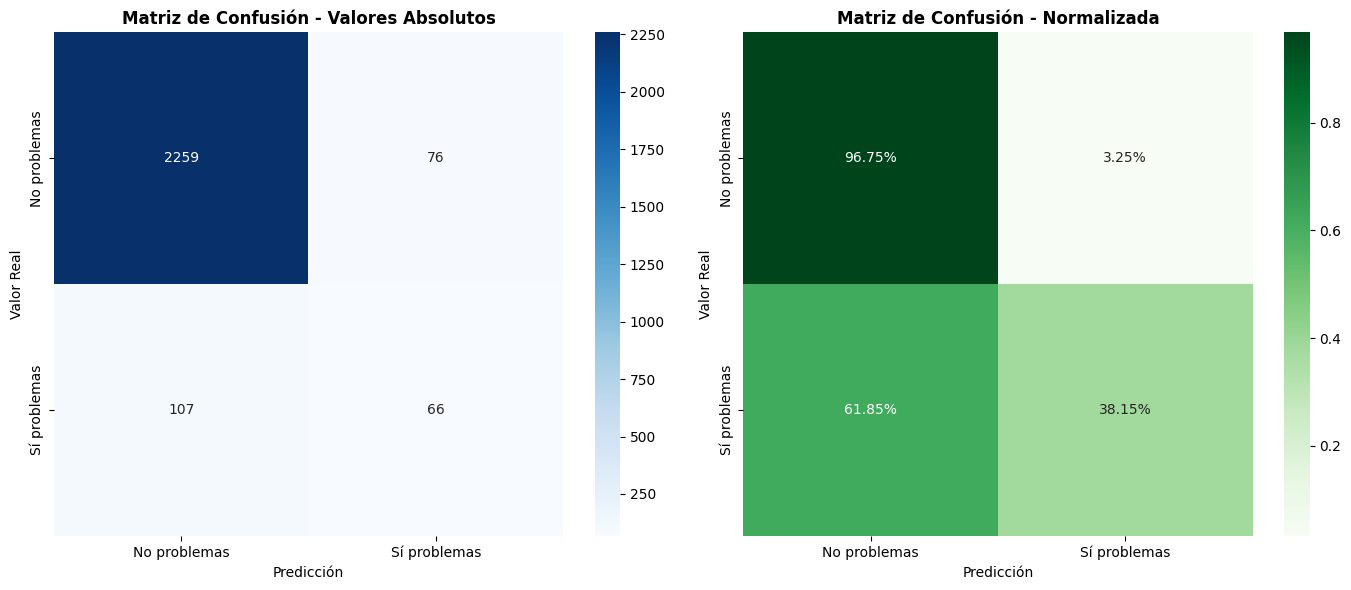

In [42]:

# Calcular matriz
cm = confusion_matrix(y_test, y_pred_test)

print(f"\n{cm}")

# Desglose
TN, FP, FN, TP = cm.ravel()

print(f"\n DESGLOSE:")
print(f"   TN (Verdaderos Negativos): {TN:,}")
print(f"      → Predijo 'No problemas' y era correcto")
print(f"\n   FP (Falsos Positivos): {FP:,}")
print(f"      → Predijo 'Sí problemas' pero NO los tiene")
print(f"      → Rechaza préstamo a buen cliente")
print(f"\n   FN (Falsos Negativos): {FN:,}")
print(f"      → Predijo 'No problemas' pero SÍ los tiene ")
print(f"      → Da préstamo a mal cliente (COSTOSO)")
print(f"\n   TP (Verdaderos Positivos): {TP:,}")
print(f"      → Predijo 'Sí problemas' y era correcto")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz absoluta
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No problemas', 'Sí problemas'],
            yticklabels=['No problemas', 'Sí problemas'])
axes[0].set_title('Matriz de Confusión - Valores Absolutos', fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

# Matriz normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[1],
            xticklabels=['No problemas', 'Sí problemas'],
            yticklabels=['No problemas', 'Sí problemas'])
axes[1].set_title('Matriz de Confusión - Normalizada', fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

ANÁLISIS DE ERRORES

 RESUMEN:
   Total de casos en test: 2,508
   Casos correctos: 2,325 (92.70%)
   Casos incorrectos: 183 (7.30%)

 FALSOS POSITIVOS (FP): 76
   Predijo 'Sí problemas' pero era 'No problemas'

   Características promedio de FP:
      Probabilidad media: 0.6563
      Edad media: 45.6 años
      Ingreso medio: $4,867.18

   Primeros 5 casos de FP:
     age  MonthlyIncome  DebtRatio  Probabilidad_clase_1
66    32         3750.0   1.289789              0.560000
75    36          984.0   0.116751              0.546667
131   64         9400.0   0.501755              0.630000
202   56         7451.0   0.341385              0.523333
203   30         1500.0   0.229847              0.563333

 FALSOS NEGATIVOS (FN): 107
   Predijo 'No problemas' pero era 'Sí problemas'  COSTOSO

   Características promedio de FN:
      Probabilidad media: 0.2219
      Edad media: 44.7 años
      Ingreso medio: $7,396.91

   Primeros 5 casos de FN:
     age  MonthlyIncome  DebtRatio  Probabilida

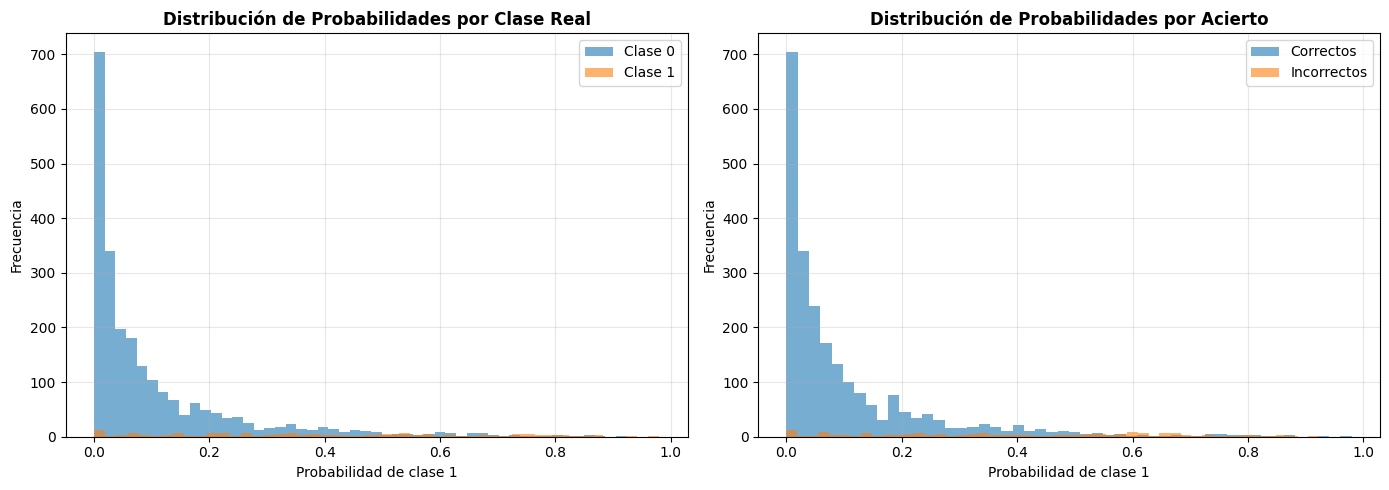

In [41]:

print("ANÁLISIS DE ERRORES")


# Crear DataFrame con predicciones
errores_df = pd.DataFrame({
    'Real': y_test.values,
    'Prediccion': y_pred_test,
    'Probabilidad_clase_1': y_proba_test,
    'Correcto': y_test.values == y_pred_test
})

# Añadir features originales
errores_df = pd.concat([
    errores_df.reset_index(drop=True),
    X_test.reset_index(drop=True)
], axis=1)

# Casos incorrectos
incorrectos = errores_df[~errores_df['Correcto']]

print(f"\n RESUMEN:")
print(f"   Total de casos en test: {len(errores_df):,}")
print(f"   Casos correctos: {errores_df['Correcto'].sum():,} ({errores_df['Correcto'].mean()*100:.2f}%)")
print(f"   Casos incorrectos: {len(incorrectos):,} ({len(incorrectos)/len(errores_df)*100:.2f}%)")

# Falsos Positivos
fp_casos = incorrectos[(incorrectos['Real'] == 0) & (incorrectos['Prediccion'] == 1)]
print(f"\n FALSOS POSITIVOS (FP): {len(fp_casos):,}")
print(f"   Predijo 'Sí problemas' pero era 'No problemas'")
if len(fp_casos) > 0:
    print(f"\n   Características promedio de FP:")
    print(f"      Probabilidad media: {fp_casos['Probabilidad_clase_1'].mean():.4f}")
    print(f"      Edad media: {fp_casos['age'].mean():.1f} años")
    print(f"      Ingreso medio: ${fp_casos['MonthlyIncome'].mean():,.2f}")
    print(f"\n   Primeros 5 casos de FP:")
    print(fp_casos[['age', 'MonthlyIncome', 'DebtRatio', 'Probabilidad_clase_1']].head())

# Falsos Negativos
fn_casos = incorrectos[(incorrectos['Real'] == 1) & (incorrectos['Prediccion'] == 0)]
print(f"\n FALSOS NEGATIVOS (FN): {len(fn_casos):,}") 
print(f"   Predijo 'No problemas' pero era 'Sí problemas'  COSTOSO")
if len(fn_casos) > 0:
    print(f"\n   Características promedio de FN:")
    print(f"      Probabilidad media: {fn_casos['Probabilidad_clase_1'].mean():.4f}")
    print(f"      Edad media: {fn_casos['age'].mean():.1f} años")
    print(f"      Ingreso medio: ${fn_casos['MonthlyIncome'].mean():,.2f}")
    print(f"\n   Primeros 5 casos de FN:")
    print(fn_casos[['age', 'MonthlyIncome', 'DebtRatio', 'Probabilidad_clase_1']].head())

# Distribución de probabilidades
print(f"\n DISTRIBUCIÓN DE PROBABILIDADES DE PREDICCIÓN:")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Por clase real
for clase in [0, 1]:
    probs = errores_df[errores_df['Real'] == clase]['Probabilidad_clase_1']
    axes[0].hist(probs, bins=50, alpha=0.6, label=f'Clase {clase}')

axes[0].set_xlabel('Probabilidad de clase 1')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Probabilidades por Clase Real', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Por acierto/error
for correcto in [True, False]:
    probs = errores_df[errores_df['Correcto'] == correcto]['Probabilidad_clase_1']
    label = 'Correctos' if correcto else 'Incorrectos'
    axes[1].hist(probs, bins=50, alpha=0.6, label=label)

axes[1].set_xlabel('Probabilidad de clase 1')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Probabilidades por Acierto', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()